In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 13

2025-02-10 16:04:05.909099: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-10 16:04:05.945055: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-10 16:04:05.945817: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-10 16:04:06.497251: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Specify each path

In [2]:
dataset = '/home/jose/catkin_ws/src/ros_hand_gesture_recognition/src/model/keypoint_classifier/keypoint.csv'
model_save_path = '/home/jose/catkin_ws/src/ros_hand_gesture_recognition/src/model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = '/home/jose/catkin_ws/src/ros_hand_gesture_recognition/src/model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 12

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

2025-02-10 16:04:09.050984: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-02-10 16:04:09.053642: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 12)                132       
                                                                 
Total params: 1202 (4.70 KB)
Trainable params: 1202 (4.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=30, verbose=2)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_dataset,
    y_dataset,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/13 [=>............................] - ETA: 13s - loss: 2.5399 - accuracy: 0.0625
Epoch 1: saving model to /home/jose/catkin_ws/src/ros_hand_gesture_recognition/src/model/keypoint_classifier/keypoint_classifier.hdf5
13/13 [==============================] - 1s 21ms/step - loss: 2.4951 - accuracy: 0.0942 - val_loss: 2.4246 - val_accuracy: 0.1228
Epoch 2/1000
 1/13 [=>............................] - ETA: 0s - loss: 2.4532 - accuracy: 0.1172
Epoch 2: saving model to /home/jose/catkin_ws/src/ros_hand_gesture_recognition/src/model/keypoint_classifier/keypoint_classifier.hdf5
13/13 [==============================] - 0s 4ms/step - loss: 2.4385 - accuracy: 0.1063 - val_loss: 2.3854 - val_accuracy: 0.1535
Epoch 3/1000
 1/13 [=>............................] - ETA: 0s - loss: 2.3714 - accuracy: 0.1562
Epoch 3: saving model to /home/jose/catkin_ws/src/ros_hand_gesture_recognition/src/model/keypoint_classifier/keypoint_classifier.hdf5
13/13 [==============================] - 0s 4ms/st

/home/jose/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 5/1000
 1/13 [=>............................] - ETA: 0s - loss: 2.3095 - accuracy: 0.1875
Epoch 5: saving model to /home/jose/catkin_ws/src/ros_hand_gesture_recognition/src/model/keypoint_classifier/keypoint_classifier.hdf5
13/13 [==============================] - 0s 4ms/step - loss: 2.3421 - accuracy: 0.1800 - val_loss: 2.2783 - val_accuracy: 0.1893
Epoch 6/1000
 1/13 [=>............................] - ETA: 0s - loss: 2.3527 - accuracy: 0.2031
Epoch 6: saving model to /home/jose/catkin_ws/src/ros_hand_gesture_recognition/src/model/keypoint_classifier/keypoint_classifier.hdf5
13/13 [==============================] - 0s 4ms/step - loss: 2.3285 - accuracy: 0.1775 - val_loss: 2.2453 - val_accuracy: 0.1918
Epoch 7/1000
 1/13 [=>............................] - ETA: 0s - loss: 2.2986 - accuracy: 0.1406
Epoch 7: saving model to /home/jose/catkin_ws/src/ros_hand_gesture_recognition/src/model/keypoint_classifier/keypoint_classifier.hdf5
13/13 [==============================] - 0s 4ms/step

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

4/4 [==============================] - 0s 1ms/step - loss: 0.1904 - accuracy: 0.9693


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 52ms/step
[9.8462093e-01 3.9469963e-04 3.2304601e-05 5.5707961e-14 2.9517744e-06
 5.5195332e-10 7.2797359e-04 7.4707700e-08 1.2881932e-02 4.9774506e-08
 1.3391672e-03 1.8298055e-09]
0


# Confusion matrix

13/13 [==============================] - 0s 792us/step


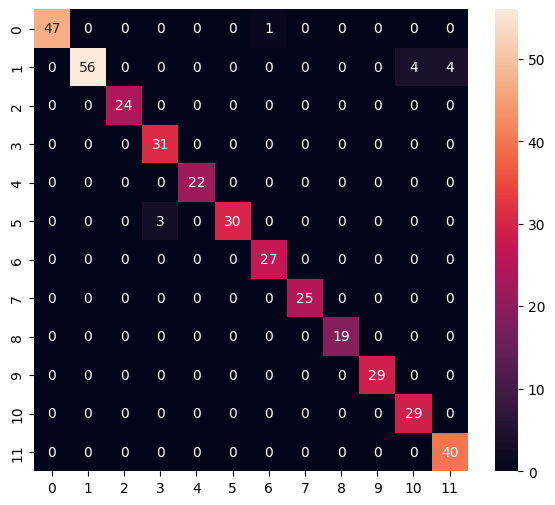

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        48
           1       1.00      0.88      0.93        64
           2       1.00      1.00      1.00        24
           3       0.91      1.00      0.95        31
           4       1.00      1.00      1.00        22
           5       1.00      0.91      0.95        33
           6       0.96      1.00      0.98        27
           7       1.00      1.00      1.00        25
           8       1.00      1.00      1.00        19
           9       1.00      1.00      1.00        29
          10       0.88      1.00      0.94        29
          11       0.91      1.00      0.95        40

    accuracy                           0.97       391
   macro avg       0.97      0.98      0.97       391
weighted avg       0.97      0.97      0.97       391



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

/home/jose/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /tmp/tmprftpoj0u/assets


INFO:tensorflow:Assets written to: /tmp/tmprftpoj0u/assets
2025-02-10 16:04:41.737222: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2025-02-10 16:04:41.737264: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2025-02-10 16:04:41.737893: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmprftpoj0u
2025-02-10 16:04:41.739869: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2025-02-10 16:04:41.739902: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /tmp/tmprftpoj0u
2025-02-10 16:04:41.745923: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:375] MLIR V1 optimization pass is not enabled
2025-02-10 16:04:41.747600: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2025-02-10 16:04:41.784888: I tensorflow/cc/saved_model/loader.cc:215] Running initializatio

6896

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 41 µs, sys: 3 µs, total: 44 µs
Wall time: 48.4 µs


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.8462081e-01 3.9470010e-04 3.2304655e-05 5.5708168e-14 2.9517767e-06
 5.5195321e-10 7.2797417e-04 7.4707692e-08 1.2881941e-02 4.9774588e-08
 1.3391683e-03 1.8298053e-09]
0
